In [ ]:
import cv2
import time
import numpy as np
import matplotlib.pyplot as plt
from skimage.feature import graycomatrix, graycoprops

image = cv2.imread('./need/black/img154.jpg')
image = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)

min_size = 15
max_size = 27
x,y = image.shape[:2]
#print(x,y)

offset = 5
x_filter = int((x)/offset)
y_filter = int((y)/offset)

co_contrast = np.zeros((x_filter ,y_filter))
co_homogeneity = np.zeros((x_filter ,y_filter))
co_correlation = np.zeros((x_filter ,y_filter))

for i in range(x):
    for j in range(y):
        if(image[i, j] <= 31):
            image[i, j] = 16
        
        elif(image[i, j] <= 63):
            image[i, j] = 47
        
        elif(image[i, j] <= 95):
            image[i, j] = 79

        elif(image[i, j] <= 127):
            image[i, j] = 111

        elif(image[i, j] <= 159):
            image[i, j] = 143

        elif(image[i, j] <= 191):
            image[i, j] = 175

        elif(image[i, j] <= 223):
            image[i, j] = 207

        else:
            image[i, j] = 239

for size_filter in range(min_size, max_size, 3):
    end_r = x - size_filter + offset
    end_c = y - size_filter + offset

    for i in range(0, end_r, offset):
        for j in range(0, end_c, offset):
            f = image[ i : i + size_filter , j : j + size_filter ]
            result = graycomatrix( f, [1],[0] )
            co_contrast[int(i/offset),int(j/offset)] = float(graycoprops(result, 'contrast'))
            co_homogeneity[int(i/offset),int(j/offset)] = float(graycoprops(result, 'homogeneity'))
            co_correlation[int(i/offset),int(j/offset)] = float(graycoprops(result, 'correlation'))


    #print mean(no error)
    '''
    homogeneity_mean = np.mean(co_homogeneity)
    contrast_mean = np.mean(co_contrast)
    correlation_mean = np.mean(co_correlation)
    print("homogeneity mean: %f seconds" % homogeneity_mean)
    print("contrast mean: %f seconds" % contrast_mean)
    print("correlation mean: %f seconds" % correlation_mean)
    '''

    for i in range(x_filter):
        for j in range(y_filter):
            if(size_filter < 18):
                if co_correlation[i,j] < 0.45:
                    if co_contrast[i,j] > 90:
                        if co_homogeneity[i,j] < 0.077:
                            cv2.rectangle(image,( j*offset , i*offset ),( j*offset+10 , i*offset+10 ) ,(255,0,0),2)
                            print("< 18", size_filter)

            else:
                if co_correlation[i,j] > 0.835:
                    if co_contrast[i,j] > 43:
                        if co_homogeneity[i,j] < 0.23:
                            cv2.rectangle(image,( j*offset , i*offset ),( j*offset+10 , i*offset+10 ) ,(255,0,0),2)
                            print("> 18", size_filter)


image = cv2.cvtColor(image, cv2.COLOR_GRAY2RGB)
plt.imshow(image)
plt.show()
cv2.imwrite("./result.png", image)


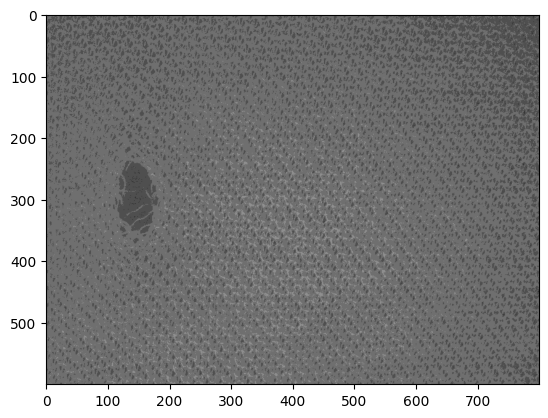

In [12]:
import cv2
import time
import numpy as np
import matplotlib.pyplot as plt
from skimage.feature import graycomatrix, graycoprops

image = cv2.imread('./need/black/img154.jpg')
image = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)

nr, nc = image.shape[:2]

for x in range(nr):
    for y in range(nc):
        if(image[x, y] <= 31):
            image[x, y] = 16
        
        elif(image[x, y] <= 63):
            image[x, y] = 47
        
        elif(image[x, y] <= 95):
            image[x, y] = 79

        elif(image[x, y] <= 127):
            image[x, y] = 111

        elif(image[x, y] <= 159):
            image[x, y] = 143

        elif(image[x, y] <= 191):
            image[x, y] = 175

        elif(image[x, y] <= 223):
            image[x, y] = 207

        else:
            image[x, y] = 239


image = cv2.cvtColor(image, cv2.COLOR_GRAY2RGB)
plt.imshow(image)
plt.show()

15


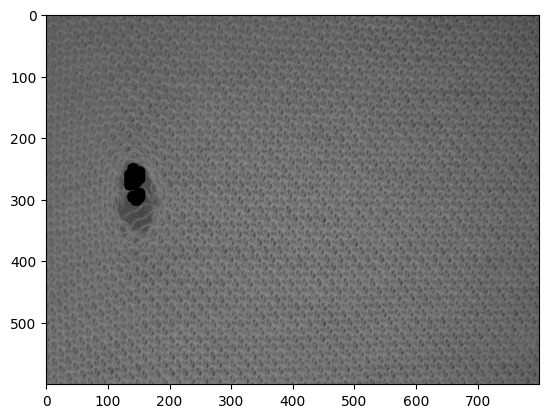

23


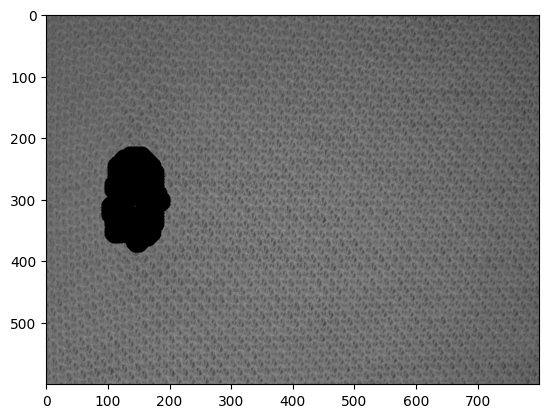

33


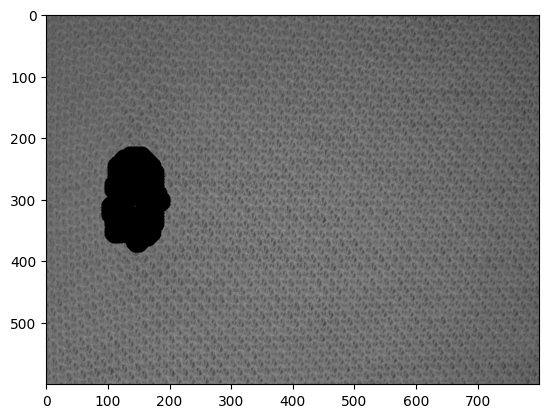

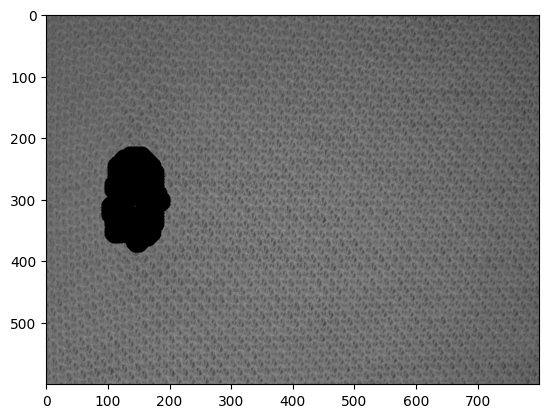

True

In [34]:
import cv2
import time
import numpy as np
import matplotlib.pyplot as plt
from skimage.feature import graycomatrix, graycoprops
import time

image = cv2.imread('./need/black/img154.png')
image = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)

min_size = 15
max_size = 33
#size_filter = 15
x, y = image.shape[:2]
#print(x,y)

new_img = image.copy()

offset = 5
x_filter = int((x)/offset)
y_filter = int((y)/offset)


for size_filter in range(min_size, max_size+1):

    if(size_filter == 15 or size_filter == 23 or size_filter == 33):
        print(size_filter)
        
        end_r = x - size_filter + offset
        end_c = y - size_filter + offset

        co_contrast = np.zeros((x_filter ,y_filter))
        co_homogeneity = np.zeros((x_filter ,y_filter))
        co_correlation = np.zeros((x_filter ,y_filter))

        for i in range(0, end_r, offset):
            for j in range(0, end_c, offset):
                f = image[ i : i + size_filter , j : j + size_filter ]
                result = graycomatrix( f, [1],[0] )
                co_contrast[int(i/offset),int(j/offset)] = float(graycoprops(result, 'contrast'))
                co_homogeneity[int(i/offset),int(j/offset)] = float(graycoprops(result, 'homogeneity'))
                co_correlation[int(i/offset),int(j/offset)] = float(graycoprops(result, 'correlation'))

        for i in range(0, x_filter):
            for j in range(0, y_filter):
                has_print = 0

                match size_filter:
                    case 15:
                        for k in range(0, 6):
                            if(has_print):
                                break

                            for l in range(0, 6):
                                if(new_img[i+k, j+l] == 0):
                                    has_print = 1
                                    break

                        if(not has_print):
                            if co_correlation[i,j] < 0.22:
                                if co_contrast[i,j] > 10:  
                                    if co_homogeneity[i,j] < 0.28:
                                        cv2.circle(new_img,( j*offset+6 , i*offset+6 ),10 ,0,-1)

                    case 23:
                        for k in range(0, 10):
                            if(has_print):
                                break

                            for l in range(0, 10):
                                if(new_img[i+k, j+l] == 0):
                                    has_print = 1
                                    break

                        if(not has_print):
                            if co_correlation[i,j] > 0.8079:
                                if co_contrast[i,j] > 35:
                                    if co_homogeneity[i,j] < 0.45:
                                        cv2.circle(new_img,( j*offset+8 , i*offset+8 ),19 ,0,-1)
                                    
                    case 33:
                        for k in range(0, 5):
                            if(has_print):
                                break

                            for l in range(0, 5):
                                if(new_img[i+k, j+l] == 0):
                                    has_print = 1
                                    break

                        if(not has_print):
                            if co_correlation[i,j] > 0.89:
                                cv2.circle(new_img,( j*offset+6 , i*offset+6 ),10 ,0,-1)

        plt.imshow(cv2.cvtColor(new_img, cv2.COLOR_GRAY2RGB))
        plt.show()

        
        #print mean(no error)
        '''
        homogeneity_mean = np.mean(co_homogeneity)
        contrast_mean = np.mean(co_contrast)
        correlation_mean = np.mean(co_correlation)
        print("homogeneity mean: %f seconds" % homogeneity_mean)
        print("contrast mean: %f seconds" % contrast_mean)
        print("correlation mean: %f seconds" % correlation_mean)
        '''


image = cv2.cvtColor(new_img, cv2.COLOR_GRAY2RGB)
plt.imshow(image)
plt.show()
cv2.imwrite("./result.png", image)


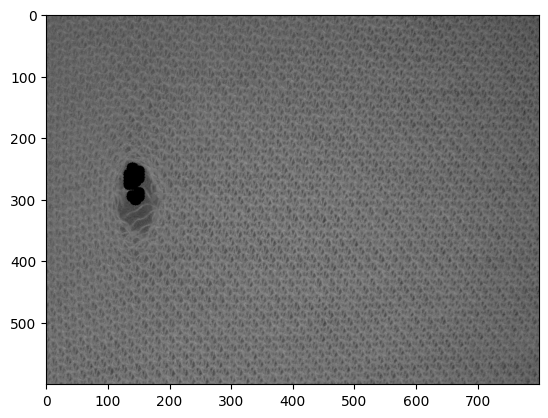

In [23]:
import cv2
import time
import numpy as np
import matplotlib.pyplot as plt
from skimage.feature import graycomatrix, graycoprops

image = cv2.imread('./need/black/img154.jpg')
image = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)

new_img = image.copy()

size_filter = 15
x,y = image.shape[:2]
#print(x,y)

offset = 5
x_filter = int((x)/offset)
y_filter = int((y)/offset)

co_contrast = np.zeros((x_filter ,y_filter))
co_homogeneity = np.zeros((x_filter ,y_filter))
co_correlation = np.zeros((x_filter ,y_filter))

end_r = x - size_filter + offset
end_c = y - size_filter + offset

for i in range(0, end_r, offset):
    for j in range(0, end_c, offset):
        f = image[ i : i + size_filter , j : j + size_filter ]
        result = graycomatrix( f, [1],[0] )
        co_contrast[int(i/offset),int(j/offset)] = float(graycoprops(result, 'contrast'))
        co_homogeneity[int(i/offset),int(j/offset)] = float(graycoprops(result, 'homogeneity'))
        co_correlation[int(i/offset),int(j/offset)] = float(graycoprops(result, 'correlation'))


#print mean(no error)
'''
homogeneity_mean = np.mean(co_homogeneity)
contrast_mean = np.mean(co_contrast)
correlation_mean = np.mean(co_correlation)
print("homogeneity mean: %f seconds" % homogeneity_mean)
print("contrast mean: %f seconds" % contrast_mean)
print("correlation mean: %f seconds" % correlation_mean)
'''

for i in range(x_filter):
    for j in range(y_filter):
        has_print = 0

        for x in range(5):
            if(has_print):
                break

            for y in range(5):
                if(new_img[i+x, j+y] == 0):
                    has_print = 1
                    break

        if(not has_print):
            if co_correlation[i,j] < 0.22:
                if co_contrast[i,j] > 10:  
                    if co_homogeneity[i,j] < 0.28:
                        cv2.circle(new_img,( j*offset+6 , i*offset+6 ),10 ,0,-1)

image = cv2.cvtColor(new_img, cv2.COLOR_GRAY2RGB)
plt.imshow(image)
plt.show()
#cv2.imwrite("./result.png", image)


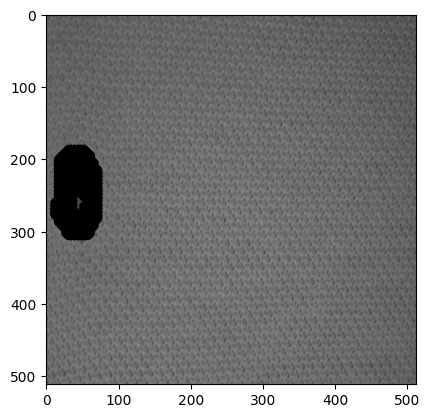

In [3]:
import cv2
import time
import numpy as np
import matplotlib.pyplot as plt
from skimage.feature import graycomatrix, graycoprops

image = cv2.imread('./need/black/img172.png')
image = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)

new_img = image.copy()

size_filter = 23
x,y = image.shape[:2]
#print(x,y)

offset = 5
x_filter = int((x)/offset)
y_filter = int((y)/offset)

co_contrast = np.zeros((x_filter ,y_filter))
co_homogeneity = np.zeros((x_filter ,y_filter))
co_correlation = np.zeros((x_filter ,y_filter))

end_r = x - size_filter + offset
end_c = y - size_filter + offset

for i in range(0, end_r, offset):
    for j in range(0, end_c, offset):
        f = image[ i : i + size_filter , j : j + size_filter ]
        result = graycomatrix( f, [1],[0] )
        co_contrast[int(i/offset),int(j/offset)] = float(graycoprops(result, 'contrast'))
        co_homogeneity[int(i/offset),int(j/offset)] = float(graycoprops(result, 'homogeneity'))
        co_correlation[int(i/offset),int(j/offset)] = float(graycoprops(result, 'correlation'))


#print mean(no error)
'''
homogeneity_mean = np.mean(co_homogeneity)
contrast_mean = np.mean(co_contrast)
correlation_mean = np.mean(co_correlation)
print("homogeneity mean: %f seconds" % homogeneity_mean)
print("contrast mean: %f seconds" % contrast_mean)
print("correlation mean: %f seconds" % correlation_mean)
'''

for i in range(x_filter):
    for j in range(y_filter):
        has_print = 0

        for k in range(0, 7):
            if(has_print):
                break

            for l in range(0, 7):
                if(new_img[i+k, j+l] == 0):
                    has_print = 1
                    break

        if(not has_print):
            if co_correlation[i,j] > 0.809:
                if co_contrast[i,j] > 35:
                    if co_homogeneity[i,j] < 0.31:
                        cv2.circle(new_img,( j*offset+4 , i*offset+4 ),14 ,0,-1)
                        print(i, j, co_correlation[i, j], co_contrast[i, j], co_homogeneity[i, j])
                        
image = cv2.cvtColor(new_img, cv2.COLOR_GRAY2RGB)
plt.imshow(image)
plt.show()
#cv2.imwrite("./result.png", image)


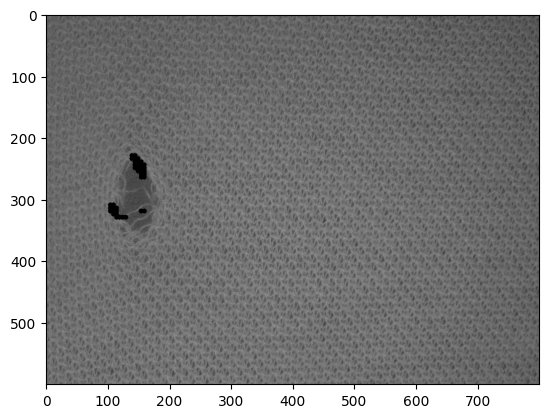

In [7]:
import cv2
import time
import numpy as np
import matplotlib.pyplot as plt
from skimage.feature import graycomatrix, graycoprops

image = cv2.imread('./need/black/img154.jpg')
image = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)

new_img = image.copy()

size_filter = 33
x,y = image.shape[:2]
#print(x,y)

offset = 5
x_filter = int((x)/offset)
y_filter = int((y)/offset)

co_contrast = np.zeros((x_filter ,y_filter))
co_homogeneity = np.zeros((x_filter ,y_filter))
co_correlation = np.zeros((x_filter ,y_filter))

end_r = x - size_filter + offset
end_c = y - size_filter + offset

for i in range(0, end_r, offset):
    for j in range(0, end_c, offset):
        f = image[ i : i + size_filter , j : j + size_filter ]
        result = graycomatrix( f, [1],[0] )
        co_contrast[int(i/offset),int(j/offset)] = float(graycoprops(result, 'contrast'))
        co_homogeneity[int(i/offset),int(j/offset)] = float(graycoprops(result, 'homogeneity'))
        co_correlation[int(i/offset),int(j/offset)] = float(graycoprops(result, 'correlation'))


#print mean(no error)
'''
homogeneity_mean = np.mean(co_homogeneity)
contrast_mean = np.mean(co_contrast)
correlation_mean = np.mean(co_correlation)
print("homogeneity mean: %f seconds" % homogeneity_mean)
print("contrast mean: %f seconds" % contrast_mean)
print("correlation mean: %f seconds" % correlation_mean)
'''

for i in range(x_filter):
    for j in range(y_filter):
        has_print = 0

        for x in range(2):
            if(has_print):
                break

            for y in range(2):
                if(new_img[i+x, j+y] == 0):
                    has_print = 1
                    break

        if(not has_print):
            if co_correlation[i,j] > 0.89:
                cv2.circle(new_img,( j*offset+6 , i*offset+6 ),10 ,0,-1)
                        
image = cv2.cvtColor(new_img, cv2.COLOR_GRAY2RGB)
plt.imshow(image)
plt.show()
#cv2.imwrite("./result.png", image)


15


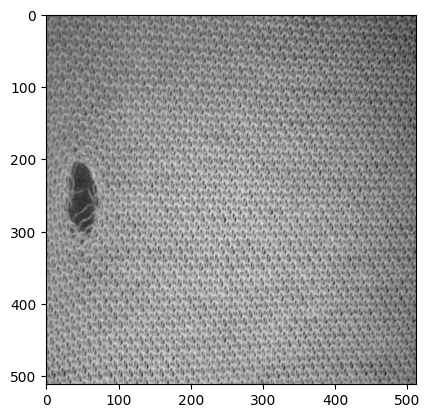

23


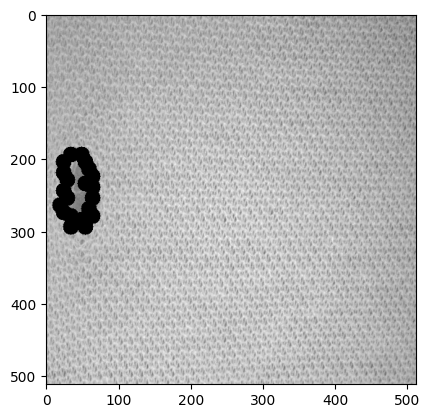

33


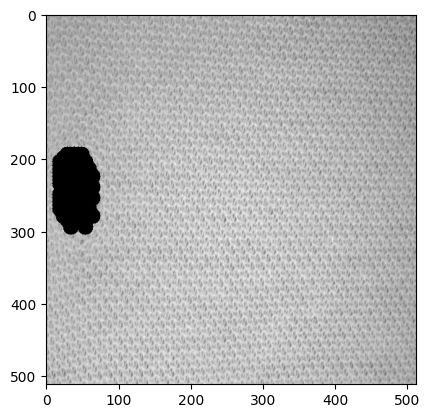

17


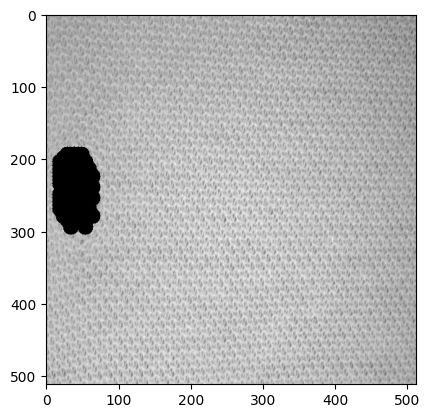

22


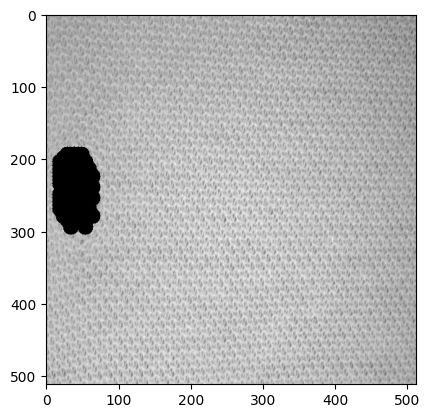

final


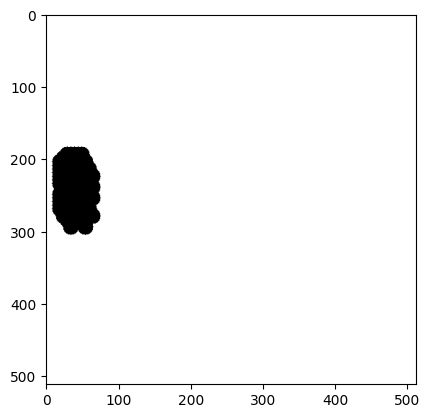

True

In [91]:
import cv2
import time
import numpy as np
import matplotlib.pyplot as plt
from skimage.feature import graycomatrix, graycoprops
import time

image = cv2.imread('image2.png')
image = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)

#size_filter = 15
x, y = image.shape[:2]
#print(x,y)

new_img = image.copy()

offset = 5
x_filter = int((x)/offset)
y_filter = int((y)/offset)


def lot_filter(size_filter, g):
    print(size_filter)
    
    end_r = x - size_filter + offset
    end_c = y - size_filter + offset

    co_contrast = np.zeros((x_filter ,y_filter))
    co_homogeneity = np.zeros((x_filter ,y_filter))
    co_correlation = np.zeros((x_filter ,y_filter))

    for i in range(0, end_r, offset):
        for j in range(0, end_c, offset):
            f = image[ i : i + size_filter , j : j + size_filter ]
            result = graycomatrix( f, [1],[0] )
            co_contrast[int(i/offset),int(j/offset)] = float(graycoprops(result, 'contrast'))
            co_homogeneity[int(i/offset),int(j/offset)] = float(graycoprops(result, 'homogeneity'))
            co_correlation[int(i/offset),int(j/offset)] = float(graycoprops(result, 'correlation'))

    for i in range(0, x_filter):
        for j in range(0, y_filter):
            # detection is there already had cover around 
            has_print = 0
            # count there already had cover around yet
            # to judge the filter size 17 should it be cover the loss from above filter
            temp = 0

            match size_filter:
                # initial detection
                # test by img154 from texture_video
                case 15:
                    if(i*offset+6+5 < x and j*offset+6+5 < y):
                        for k in range(0, 6):
                            if(has_print):
                                break

                            for l in range(0, 6):
                                if(g[i*offset+6+k, j*offset+6+l] == 0):
                                    has_print = 1
                                    break

                    if(not has_print):
                        if co_correlation[i,j] < 0.22:
                            if co_contrast[i,j] > 10:  
                                if co_homogeneity[i,j] < 0.28:
                                    cv2.circle(g,( j*offset+6 , i*offset+6 ),10 ,0,-1)

                # detection the hole edge 
                # test by image2 and img154 from texture_video
                case 23:
                    if(i*offset+4+4 < x and j*offset+4+4 < y):
                        for k in range(0, 5):
                            if(has_print):
                                break

                            for l in range(0, 5):
                                if(g[i*offset+4+k, j*offset+4+l] == 0):
                                    has_print = 1
                                    break

                    if(not has_print):
                        if co_correlation[i,j] > 0.809:
                            if co_contrast[i,j] > 35:
                                if co_homogeneity[i,j] < 0.31:
                                    cv2.circle(new_img,( j*offset+4 , i*offset+4 ),11 ,0,-1)
                                
                # detection the loss those filter size 23 didn't cover 
                # test by img154 and img172 from texture_video
                case 33:
                    if(i*offset+7 < x and j*offset+7 < y):
                        for k in range(0, 8):
                            if(has_print):
                                break

                            for l in range(0, 8):
                                # skip the pixel nearby center of circle
                                if(not 2<=k and not k<=6 and not 2<=l and not l<=6):
                                    if(g[i*offset+k, j*offset+l] == 0):
                                        has_print = 1
                                        break

                    if(not has_print):
                        if co_correlation[i,j] > 0.89:
                            cv2.circle(g,( j*offset+4 , i*offset+4 ),11 ,0,-1)

                # detection the line by image1
                case 17:
                    if(i*offset-8+10 < x and j*offset-8+10 < y):
                        for k in range(0, 11):
                            for l in range(0, 11):
                                if(g[i*offset-8+k, j*offset-8+l] == 0):
                                    has_print = 1

                    if(not has_print):
                        if co_correlation[i,j] > 0.744:
                            if co_contrast[i,j] > 20:
                                if co_homogeneity[i,j] < 0.4:
                                    cv2.rectangle(g,( j*offset-6 , i*offset-6 ),( j*offset+12 , i*offset+12 ) ,0,-1)

                # detection the loss those filter size 17 didn't cover
                case 22:
                    if(i*offset-5+10 < x and j*offset-5+10 < y):
                        for k in range(0, 11):
                            for l in range(0, 11):
                                if(g[i*offset-5+k, j*offset-5+l] == 0):
                                    has_print = 1

                    if(not has_print):
                        if co_correlation[i,j] > 0.72:
                            if co_contrast[i,j] > 25:
                                if co_homogeneity[i,j] < 0.3:
                                    cv2.rectangle(g,( j*offset-5 , i*offset-5 ),( j*offset+10 , i*offset+10 ) ,0,-1)

    plt.imshow(g, cmap='gray')
    plt.show()

    return g

new_img = lot_filter(15, new_img)
new_img = lot_filter(23, new_img)
new_img = lot_filter(33, new_img)
new_img = lot_filter(17, new_img)
new_img = lot_filter(22, new_img)

for i in range(x):
    for j in range(y):
        if(new_img[i,j] > 0):
            new_img[i,j] = 255

print("final")
plt.imshow(new_img, cmap='gray')
plt.show()
cv2.imwrite("./result.png", new_img)


23


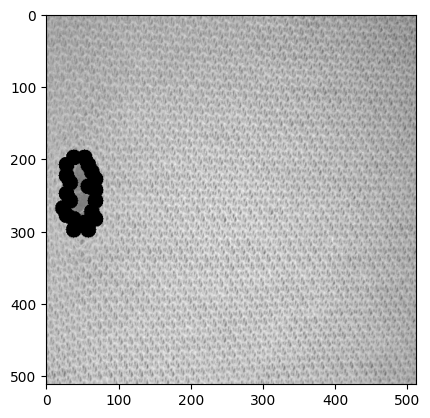

33


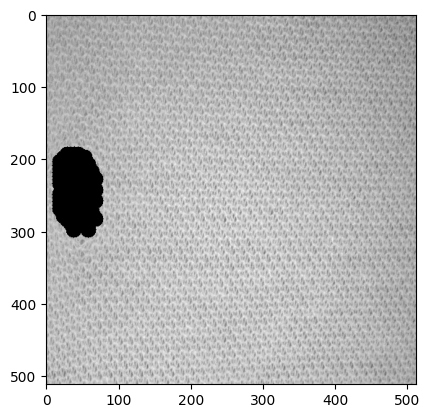

40


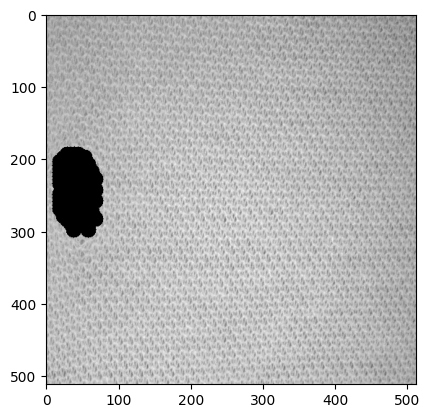

final


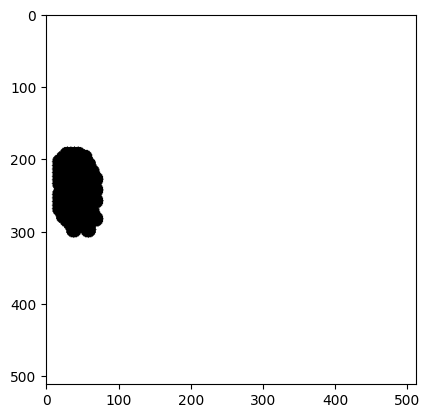

In [11]:
import cv2
import time
import numpy as np
import matplotlib.pyplot as plt
from skimage.feature import graycomatrix, graycoprops
import time

image = cv2.imread('image2.png')
image = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)

#size_filter = 15
x, y = image.shape[:2]
#print(x,y)

new_img = image.copy()


def lot_filter(size_filter, g, offset, count):
    print(size_filter)
    
    x_filter = int((x)/offset)
    y_filter = int((y)/offset)

    end_r = x - size_filter + offset
    end_c = y - size_filter + offset

    co_contrast = np.zeros((x_filter ,y_filter))
    co_homogeneity = np.zeros((x_filter ,y_filter))
    co_correlation = np.zeros((x_filter ,y_filter))

    for i in range(0, end_r, offset):
        for j in range(0, end_c, offset):
            f = image[ i : i + size_filter , j : j + size_filter ]
            result = graycomatrix( f, [1],[0] )
            co_contrast[int(i/offset),int(j/offset)] = float(graycoprops(result, 'contrast'))
            co_homogeneity[int(i/offset),int(j/offset)] = float(graycoprops(result, 'homogeneity'))
            co_correlation[int(i/offset),int(j/offset)] = float(graycoprops(result, 'correlation'))

    for i in range(0, x_filter):
        for j in range(0, y_filter):
            # Detect is there already had cover around 
            has_print = 0
            # Count there already had cover around yet
            # To judge the filter size 17 should it be cover the loss from above filter
            temp = 0

            match size_filter:
                case 15:
                    if co_correlation[i,j] < 0.22:
                            if co_contrast[i,j] > 10:  
                                if co_homogeneity[i,j] < 0.28:
                                    for l in range(5):
                                        if(has_print):
                                            break

                                        for k in range(5):
                                            if(new_img[i+l, j+k] == 0):
                                                has_print = 1
                                                break

                                    if(not has_print):
                                        cv2.circle(new_img,( j*offset+6 , i*offset+6 ),10 ,0,-1)

                # Detect the hole edge 
                # Test by image2 and img154 from texture_video
                case 23:
                    if co_correlation[i,j] > 0.809:
                        if co_contrast[i,j] > 35:
                            if co_homogeneity[i,j] < 0.31:
                                if(i*offset+8+4 < x and j*offset+8+4 < y):
                                    for k in range(0, 5):
                                        if(has_print):
                                            break

                                        for l in range(0, 5):
                                            if(g[i*offset+8+k, j*offset+8+l] == 0):
                                                has_print = 1
                                                break

                                    if(not has_print):
                                        cv2.circle(new_img,( j*offset+8 , i*offset+8 ), 11 , 0, -1)
                                        count[23]+=1
                                
                # Detect the loss those filter size 23 didn't cover 
                # Test by img154 and img172 from texture_video
                case 33:
                    if co_correlation[i,j] > 0.89:
                        if(i*offset+7 < x and j*offset+7 < y):
                            for k in range(0, 8):
                                if(has_print):
                                    break

                                for l in range(0, 8):
                                    # skip the pixel nearby center of circle
                                    if(not 2<=k and not k<=6 and not 2<=l and not l<=6):
                                        if(g[i*offset+k, j*offset+l] == 0):
                                            has_print = 1
                                            break

                            if(not has_print):
                                cv2.circle(g,( j*offset+4 , i*offset+4 ), 11 , 0, -1)
                                count[33]+=1

                # Detect the line
                # Test by image1
                case 17:
                    if co_correlation[i,j] > 0.744:
                        if co_contrast[i,j] > 20:
                            if co_homogeneity[i,j] < 0.4:
                                if(i*offset-2+4 < x and j*offset-2+4 < y):
                                    for k in range(0, 5):
                                        if(has_print):
                                            break

                                        for l in range(0, 5):
                                            if(g[i*offset-2+k, j*offset-2+l] == 0):
                                                has_print = 1

                                if(not has_print):
                                    cv2.rectangle(g,( j*offset-6 , i*offset-6 ),( j*offset+12 , i*offset+12 ) , 0, -1)

                # Detect the loss those filter size 17 didn't cover
                case 22:
                    if co_correlation[i,j] > 0.72:
                        if co_contrast[i,j] > 25:
                            if co_homogeneity[i,j] < 0.3:
                                if(i*offset-3+6 < x and j*offset-3+6 < y):
                                    for k in range(0, 7):
                                        if(has_print):
                                            break

                                        for l in range(0, 7):
                                            if(g[i*offset-3+k, j*offset-3+l] == 0):
                                                has_print = 1

                                if(not has_print):
                                    cv2.rectangle(g,( j*offset-5 , i*offset-5 ),( j*offset+10 , i*offset+10 ) , 0, -1)

                # Detect the line
                # Test by img313 from texture_video
                case 40:
                    if 0.8099011884285607 < co_correlation[i,j]:
                        if 25.976282051282055 < co_contrast[i,j]:
                            if co_homogeneity[i,j] < 0.32:
                                for l in range(12, 21):
                                    if(has_print):
                                        break

                                    for k in range(12, 21):
                                        if(g[i*offset+l][j*offset+k] == 0):
                                            has_print = 1
                                            break

                                if(not has_print):
                                    cv2.rectangle(g,( j*offset , i*offset ),( j*offset+28 , i*offset+28 ) , 0, -1)

    plt.imshow(g, cmap='gray')
    plt.show()

    return g, count


count = {23:0, 33:0}

new_img, count = lot_filter(23, new_img, 5, count)
new_img, count = lot_filter(33, new_img, 5, count)

# Because part of the line detection was written by another person, it is weak. 
# It will also detect the flawless ones, so it is restricted. 
# If the first three basically do not detect anything, it will be skipped.
if(20 > count[23] + count[33] > 0):
    new_img = lot_filter(17, new_img, 5, count)[0]
    new_img = lot_filter(22, new_img, 5, count)[0]

new_img = lot_filter(40, new_img, 3, count)[0]

for i in range(x):
    for j in range(y):
        if(new_img[i,j] > 0):
            new_img[i,j] = 255

print("final")
plt.imshow(new_img, cmap='gray')
plt.show()
#cv2.imwrite("./result.png", new_img)
